In [94]:
import numpy as np
import pandas as pd 
import os
from datetime import datetime



In [54]:
# URIS CHECK git

# Assuming your DataFrame is named 'df' and the column is named 'date_column'

# Function to convert the date format
def convert_date(date_str):
    # Parse the date string into a datetime object
    date = datetime.strptime(date_str, '%b-%Y')
    # Format the datetime object into the desired format
    formatted_date = date.strftime('%d/%m/%Y')
    return formatted_date


In [142]:
Q1_19 = pd.read_csv("Q1_2019.csv",low_memory=False)
Q2_19 = pd.read_csv("Q2_2019.csv",low_memory=False)
Q3_19 = pd.read_csv("Q3_2019.csv",low_memory=False)
Q4_19 = pd.read_csv("Q4_2019.csv",low_memory=False)

In [143]:
Q1_18 = pd.read_csv("Q1_2018.csv",low_memory=False)
Q2_18 = pd.read_csv("Q2_2018.csv",low_memory=False)
Q3_18 = pd.read_csv("Q3_2018.csv",low_memory=False)
Q4_18 = pd.read_csv("Q4_2018.csv",low_memory=False)

In [144]:
Q1_18["Qrtr"] = 1
Q2_18["Qrtr"] = 2
Q3_18["Qrtr"] = 3
Q4_18["Qrtr"] = 4
Q1_19["Qrtr"] = 1
Q2_19["Qrtr"] = 2
Q3_19["Qrtr"] = 3
Q4_19["Qrtr"] = 4

In [226]:
# making 2 big Date Frames
all_year_19 = pd.concat([Q1_19,Q2_19,Q3_19,Q4_19])
all_year_18 = pd.concat([Q1_18,Q2_18,Q3_18,Q4_18])

In [227]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.options.display.max_rows


500

In [228]:
# have a look
all_year_19.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Qrtr
0,76143686,NaN,9000,9000,9000.0,36 months,15.31%,313.36,C,C5,Senior Case Assistant,9 years,RENT,52000.0,Source Verified,Mar-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,945xx,CA,18.86,0,Nov-1999,665,669,0.0,24.0,NaN,6,0,11713,73.7%,13,w,0.00,0.00,10193.651743,10193.65,9000.00,1193.65,0.0,0.00,0.0000,Mar-2017,7064.14,NaN,Oct-2018,699,695,0,NaN,1,Individual,NaN,NaN,NaN,0,0,52953,2.0,1.0,1.0,1.0,4.0,41240.0,NaN,3.0,3.0,3789.0,74.0,15900,0.0,1.0,2.0,4,8826,4187.0,73.7,0,0,125.0,196,1,1,0,1.0,NaN,4.0,NaN,0,5,5,5,9,3,5,10,5,6,0.0,0,0,4,92.3,80.0,0,0,58425,52953,15900,42525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1,76132182,NaN,24000,24000,24000.0,60 months,6.49%,469.48,A,A2,Production Manager,10+ years,MORTGAGE,92000.0,Not Verified,Mar-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,370xx,TN,11.77,0,Mar-2002,765,769,0.0,NaN,NaN,18,0,22950,21.6%,27,w,9712.74,9712.74,17822.930000,17822.93,14287.26,3535.67,0.0,0.00,0.0000,May-2019,469.48,Jul-2019,Jun-2019,814,810,0,NaN,1,Individual,NaN,NaN,NaN,0,0,131135,0.0,1.0,1.0,1.0,10.0,6038.0,79.0,1.0,4.0,9467.0,25.0,106400,0.0,0.0,2.0,5,7285,52435.0,21.2,0,0,122.0,168,11,10,2,20.0,NaN,9.0,NaN,0,3,9,8,12,4,16,21,9,18,0.0,0,0,2,100.0,0.0,0,0,232603,28988,66500,7665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,1
2,76143234,NaN,8000,

In [229]:
all_year_19.dtypes

id                                              int64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

## Begining Initial Data Filtering

We have decided to focus our study on loans that are Mature with a term of 36 months

In [230]:
ids_that_are_relevant = all_year_19[(all_year_19.term == " 36 months") & (all_year_19.loan_status.isin(["Default","Charged Off","Fully Paid"]))].id



In [231]:
all_year_19 = all_year_19[all_year_19['id'].isin(ids_that_are_relevant)]
all_year_18 = all_year_18[all_year_18['id'].isin(ids_that_are_relevant)]

Bellow we are removing columns which do not exists in both datasets

In [232]:
# Get a list of columns in each dataframe
cols_18 = set(all_year_18.columns)
cols_19 = set(all_year_19.columns)

# Find columns that are in one dataframe but not the other
missing_cols = [col for col in cols_18.symmetric_difference(cols_19)]

# Print the missing columns, if any
if missing_cols:
    print("Columns missing in one of the dataframes:")
    for col in missing_cols:
        if col in cols_18:
            print(f"Column '{col}' is missing in 'all_year_19'")
        else:
            print(f"Column '{col}' is missing in 'all_year_18'")
else:
    print("All columns match between the two dataframes.")

Columns missing in one of the dataframes:
Column 'disbursement_method' is missing in 'all_year_19'


In [233]:
all_year_18 = all_year_18.drop(columns='disbursement_method') 

In [234]:
# in order to compare the loans across years we are will sort the ids and compare them
# Sort by id
all_year_18 = all_year_18.sort_values(by="id").reset_index(drop=True)
all_year_19 = all_year_19.sort_values(by="id").reset_index(drop=True)

## Handiling N/A

In [241]:
COLUMNS_REMOVED_BECAUSE_OF_NA = all_year_19.columns[all_year_19.isna().sum() >= len(all_year_19)*0.95] 



In [242]:
COLUMNS_REMOVED_BECAUSE_OF_NA

Index(['member_id', 'desc', 'next_pymnt_d', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_perce

What we are doing bellow is finding all columns with less than 95% na values in 2019 from all datasets

In [245]:
all_year_19 = all_year_19[all_year_19.columns] \
    .drop(columns=COLUMNS_REMOVED_BECAUSE_OF_NA)

In [247]:
all_year_18 = all_year_18[all_year_19.columns]

## Columns to remove becasue of data leakage

In [271]:
all_year_19.int_rate

0          24.99%
1           6.49%
2          18.99%
3          13.67%
4          13.67%
           ...   
269583      5.32%
269584      7.99%
269585      5.32%
269586      7.49%
269587     19.99%
Name: int_rate, Length: 269588, dtype: object

In [257]:
DATA_LEAKAGE_COLUMNS = []
# Columns to drop by number of N/A's
DATA_LEAKAGE_COLUMNS.append(all_year_19.columns[all_year_18.isna().sum()!=all_year_19.isna().sum()])


In [275]:
percentage = ((np.sum(all_year_18 != all_year_19) - np.sum(all_year_19.isna())) / all_year_19.shape[0])

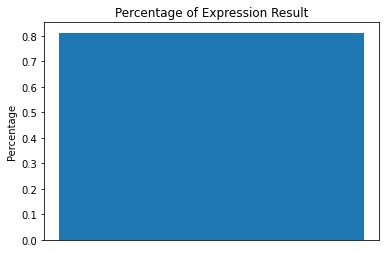

In [276]:
import numpy as np
import matplotlib.pyplot as plt


# Plot the result
plt.bar(0, percentage)
plt.ylabel('Percentage')
plt.xticks([])
plt.title('Percentage of Expression Result')
plt.show()


In [119]:
# Here we are casting column to string
all_year_19['last_pymnt_d'] = all_year_19['last_pymnt_d'].astype(str)
all_year_19['issue_d'] = all_year_19['issue_d'].astype(str)

In [120]:
all_year_19['last_pymnt_d'] = all_year_19['last_pymnt_d'].replace('nan', 'Jan-2010')

In [121]:
# Apply the conversion function to the column
all_year_19['last_pymnt_d'] = all_year_19['last_pymnt_d'].apply(convert_date)

ValueError: time data '2017-03-01' does not match format '%b-%Y'

In [ ]:
all_year_19['issue_d'] = all_year_19['issue_d'].apply(convert_date)

In [ ]:
all_year_19.last_pymnt_d

In [111]:
all_year_19['last_pymnt_d'] = pd.to_datetime(all_year_19['last_pymnt_d'], format='%d/%m/%Y')
all_year_19['issue_d'] = pd.to_datetime(all_year_19['issue_d'], format='%d/%m/%Y')

In [112]:
all_year_19['loan_lifetime_in_months'] = ((all_year_19.last_pymnt_d - all_year_19.issue_d)/np.timedelta64(1, 'M'))



In [113]:
all_year_19['loan_lifetime_in_months'] = all_year_19['loan_lifetime_in_months'].astype(float)


In [114]:
all_year_19['loan_lifetime_in_months'].describe()

count    434407.000000
mean         23.489727
std          12.227177
min           0.000000
25%          13.963326
50%          25.955358
75%          33.052013
max         168.019877
Name: loan_lifetime_in_months, dtype: float64

In [81]:
ids_that_are_relevant = all_year_19[(all_year_19.term == " 36 months") & (all_year_19.loan_status.isin(["Default","Charged Off","Fully Paid"]))].id



In [85]:
all_year_19 = all_year_19[all_year_19['id'].isin(ids_that_are_relevant)]
all_year_18 = all_year_18[all_year_18['id'].isin(ids_that_are_relevant)]

In [90]:
# in this line of code we argue that loans of 36 months are limited to 36 months

all_year_19['loan_lifetime_in_months'] = all_year_19['loan_lifetime_in_months'].clip(upper=36)

In [98]:
all_year_19['loan_lifetime_in_months'].describe()

count    269588.000000
mean         20.997146
std          10.992012
min           0.000000
25%          11.992033
50%          20.961416
75%          31.015011
max          36.000000
Name: loan_lifetime_in_months, dtype: float64

In [ ]:
all_year_18 = all_year_18[(all_year_19.term == " 36 months") & (all_year_19.loan_status.isin(["Default","Charged Off","Fully Paid"]))]
all_year_19 = all_year_19[(all_year_19.term == " 36 months") & (all_year_19.loan_status.isin(["Default","Charged Off","Fully Paid"]))]

In [93]:
all_year_18.shape

(269588, 151)

In [ ]:
all_year_19.payment_lifetime.describe()
# for low values appiring by missing date (start or finish) 
# i assing max time (36 months ) for all negative values:
## it will only hurt (lower) relised return as 
## we asuming those payments are recived as late as possible
### values with 0 get 1 (its best to check in 18 tabbles)
months_vector = list(round(all_year_19.payment_lifetime/30.4))
for i in range(len(months_vector)) : 
    if months_vector[i] < 0 :
        months_vector[i] = 36
    # ! problem with 0 values ! change this ! 
    elif months_vector[i] == 0 : 
        months_vector[i] = 1
    # ! problem with 0 values ! change this ! 

In [ ]:
# now lets take another look
sum(np.array(months_vector) <= 0 )
all_year_19["months"] = months_vector
all_year_19.months.describe()

In [ ]:
# lets calculate the monthly payments 
all_year_19["monthly_paymnent"] = all_year_19["total_pymnt"] / all_year_19["months"]

In [ ]:
all_year_19.loan_status.unique()

In [ ]:
# now we can make shpithzer Monthly payments 
shpizer_payments = []

for _, row in all_year_19.iterrows():
    pymnts = [row['funded_amnt']*-1]  
    pymnts += [row['monthly_paymnent']] * int(row['months'])  
    shpizer_payments.append(pymnts) 

In [ ]:
# Monthly rate !
realised_rate = []
for i in shpizer_payments : 
    realised_rate.append(npf.irr(i))
# let's turn it to yearly
yearly_realised_rates = ((np.array(realised_rate) + 1)**12) -1 

In [ ]:
yearly_realised_rates

In [ ]:
# now we add that list to our Data Frame as relised rtrn
all_year_19["year_realised_return"] = yearly_realised_rates

In [ ]:
all_year_19.year_realised_return.describe()

In [ ]:
grade_groups_year_19 = all_year_19.groupby(["grade"])
grade_groups_year_19.mean().year_realised_return

In [ ]:
grade_groups_year_19.std().year_realised_return

In [ ]:
grade_groups_year_19 = all_year_19.groupby(["grade","sub_grade"])
grade_groups_year_19.mean().year_realised_return

In [ ]:
grade_groups_year_19 = all_year_19.groupby(["grade","sub_grade"])
grade_groups_year_19.std().year_realised_return

In [ ]:
# cheack 1 - lets make a worst case senario in which the payment is fully paid on the last month
worst_rlsd_rate = []
shpizer_payments_2 = []

for _, row in all_year_19.iterrows():
    pymnts = [row['funded_amnt']*-1]  
    pymnts += [0] * (int(row['months'])-1) 
    pymnts += [row['total_pymnt']]
    shpizer_payments_2.append(pymnts) 

In [ ]:
# here are the worst possible payments according to dates
shpizer_payments_2[0]

In [ ]:
# now agian using irr
# Monthly rate to yearly rate
worst_realised_rate = []
for i in shpizer_payments_2 :
    # Monthly rate to yearly rate
    worst_realised_rate.append(((npf.irr(i)+1)**12)-1)

In [ ]:
all_year_19["worst_realised_rate"] = worst_realised_rate 

In [ ]:
all_year_19.worst_realised_rate.describe()

In [ ]:
grade_groups_year_19 = all_year_19.groupby(["grade","sub_grade"])
grade_groups_year_19.mean().worst_realised_rate

In [ ]:
## now lets see what makes some loans have over 100% realised int rate
check1 = all_year_19[["funded_amnt","total_pymnt","months","monthly_paymnent","year_realised_return","int_rate","worst_realised_rate"]][all_year_19.year_realised_return >= 1]

In [ ]:
# check1.year_realised_return.describe()
check1.year_realised_return.sort_values(ascending=False)

In [ ]:
# only 8 loans 
check1 

In [ ]:
# thats wired... lets have a closer look 
((npf.irr([-20000,5881,5881,5881,5881])+1)**12)-1
((npf.irr([-2000,2166])+1)**12)-1
# ok, lets check how they have low months
check2 = all_year_19[["issue_d","last_pymnt_d","months","funded_amnt","total_pymnt","year_realised_return"]][all_year_19.year_realised_return >= 1]

In [ ]:
check2
# they acually look valid... :( 
# we can again think of if irr asumption (reinvesting) is the best fit for us....
# maybe if we set an YTM% of 2% as the reinvesment rate in the IRR ?..?..?..?..? 

In [ ]:
# Assuming reinvestment at a specific rate (2% yearly)
reinvestment_rate = 0.02

# Monthly rate!
realized_rate = []
for i in shpizer_payments:
    realized_rate.append(npf.mirr(i, reinvestment_rate, reinvestment_rate/12))

# Calculate realized rates with specified reinvestment rate
yearly_realized_rates = ((np.array(realized_rate) + 1) ** 12) - 1

In [ ]:
len(all_year_19.columns),len(all_year_18.columns)

In [ ]:
columns_19 = list(all_year_19.columns)

In [ ]:
# these are all the 18 features that are not included in 19
exclude_18 = all_year_18.columns[all_year_18.columns.isin(all_year_19)== False ]
exclude_18

In [ ]:
# these are all the 19 features that are not included in 18
exclude_19 = all_year_19.columns[all_year_19.columns.isin(all_year_18)== False ]
exclude_19

In [ ]:
# we want to check for perminant data - all of this are not ! 
all_year_19_copy = all_year_19.drop(columns=exclude_19)
all_year_18_copy = all_year_18.drop(columns=exclude_18)

ValueError: Can only compare identically-labeled DataFrame objects